In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("DS1_C5_S1_BankChurn_Data_Concept.csv")

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(cat_cols)
print(num_cols)

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')
Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')


In [3]:
# BEFORE CLEANING
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [4]:
# DATA CLEANING

#FILLING MISSING VALUES WITH MODE
for i in cat_cols:
    df[i] = df[i].fillna(df[i].mode()[0])
    
#FILLING MISSING VALUES WITH MEAN
for i in num_cols:
    df[i] = df[i].fillna(df[i].mean())
    
#TURN CATEGORICAL INTO NUMERICAL

encoded_df = df.copy()

encoded_df["Gender"] = encoded_df["Gender"].replace({"M": 0, "F": 1})
encoded_df["Attrition_Flag"] = encoded_df["Attrition_Flag"].replace({"Existing Customer": 0, "Attrited Customer": 1})
encoded_df["Education_Level"] = encoded_df["Education_Level"].replace({"High School": 0, "Graduate": 1, "Uneducated": 2, "Unknown": 3, "College": 4, "Post-Graduate": 5, "Doctorate": 6})
encoded_df["Income_Category"] = encoded_df["Income_Category"].replace({"$60K - $80K": 0, "Less than $40K": 1, "$80K - $120K": 2, "$40K - $60K": 3, "$120K +": 4, "Unknown": 5})
encoded_df["Card_Category"] = encoded_df["Card_Category"].replace({"Blue": 0, "Gold": 1, "Silver": 2, "Platinum": 3})
encoded_df["Marital_Status"] = encoded_df["Marital_Status"].replace({"Married": 0, "Single": 1, "Unknown": 2, "Divorced": 3})

#OUTLIER TREATEMENT

cols = ["Customer_Age", "Dependent_count"]
for col in cols:
    while True:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        mean_value = df[col].mean()
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        if outlier.empty:
            break
        df.loc[outlier.index, col] = df[col].mean()
        df[col] = df[col].round(0).astype(int)


In [5]:
# AFTER DATA CLEANING
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


Churn Rate (%)
 Attrition_Flag
Existing Customer    83.93
Attrited Customer    16.07
Name: proportion, dtype: float64


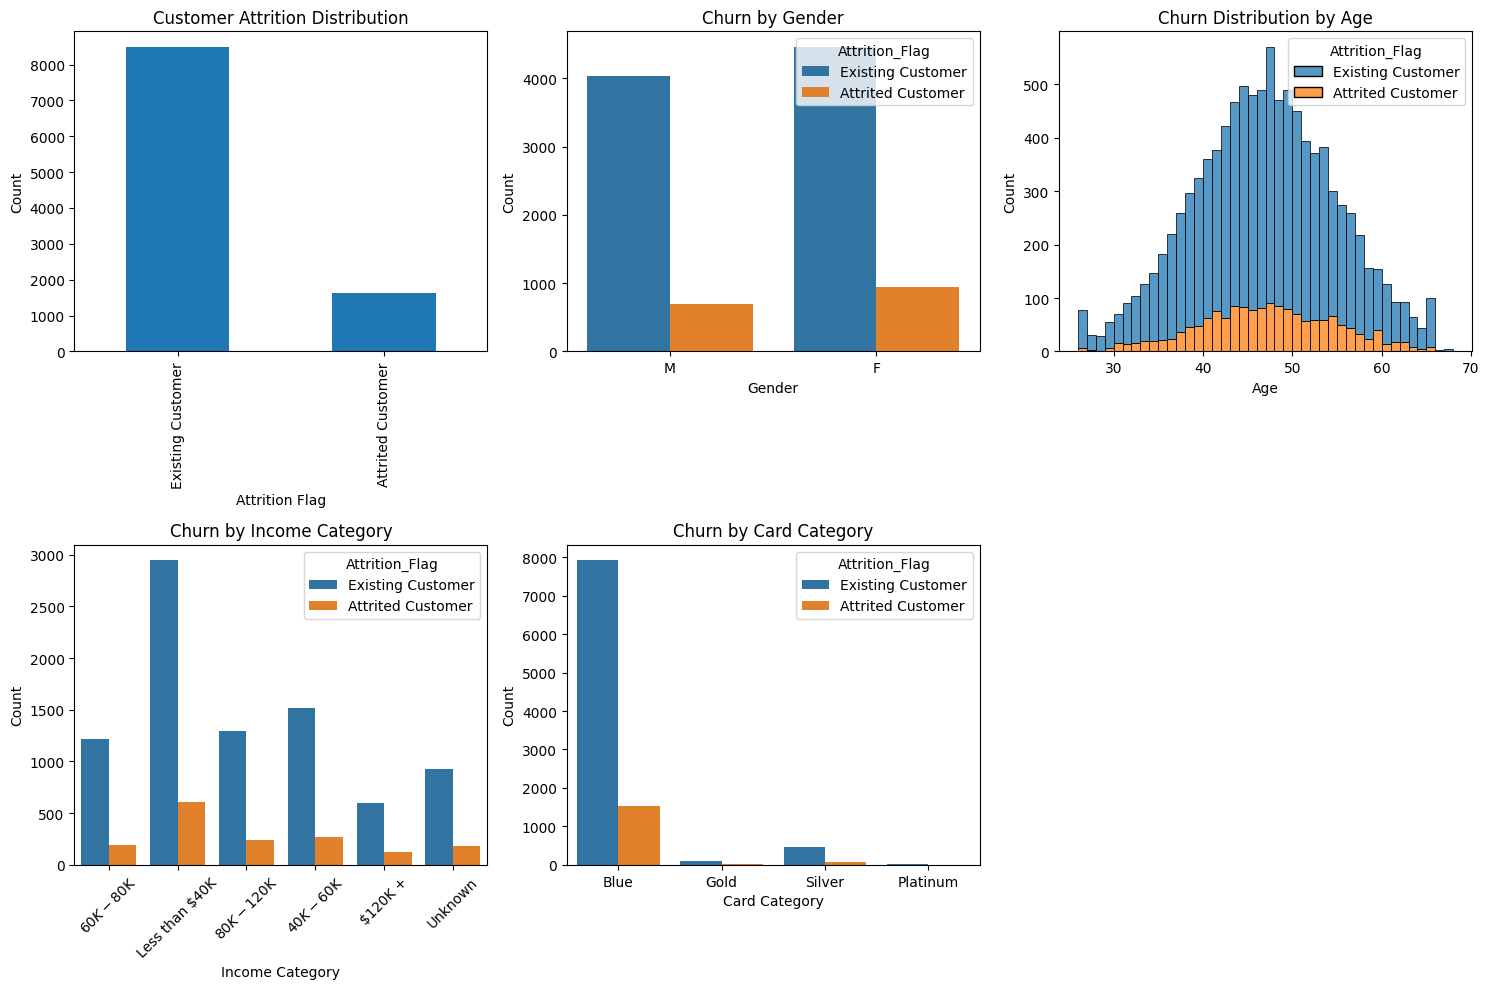

In [6]:
# 📊 Churn Analysis (Attrition_Flag)
#
# 1. Distribution of churned vs. existing customers:
#    - Compare the counts of "Existing Customer" vs. "Attrited Customer".
#
# 2. Churn rate (%) across the dataset:
#    - Calculate the percentage of customers who churned.
#
# 3. Feature influence on churn:
#    - Identify which customer attributes (age, income, card type, utilization, etc.)
#      have the strongest relationship with churn.

plt.figure(figsize=(15, 10))

# CHURN DISTRIBUTION

plt.subplot(2, 3, 1)
df["Attrition_Flag"].value_counts().plot.bar()
plt.title("Customer Attrition Distribution")
plt.xlabel("Attrition Flag")
plt.ylabel("Count")

# CHURN RATE

churn_rate = (df["Attrition_Flag"].value_counts(normalize=True)*100).round(2)
print("Churn Rate (%)\n", churn_rate)

# 1. Overall Churn Rate:
#    - Majority are "Existing Customers".
#    - Churn rate is around 15–20%.
#    - Most customers are retained, but attrition is significant.

# CHURN RATE BY GENDER

plt.subplot(2, 3, 2)
sns.countplot(x="Gender", hue="Attrition_Flag", data=df)
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# 2. Churn by Gender:
#    - Both male and female customers churn.
#    - Distribution is fairly balanced.
#    - Gender is NOT a strong driver of attrition.

#CHURN BY AGE

plt.subplot(2, 3, 3)
sns.histplot(data=df, x="Customer_Age", hue="Attrition_Flag", multiple="stack")
plt.title("Churn Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Count")

# 3. Churn by Age:
#    - Younger customers (20s–30s) show lower churn.
#    - Middle-aged customers (40s–50s) have higher churn.
#    - Older customers (60+) are relatively stable but fewer in count.
#    - Middle-aged group is at the highest risk.

#CHURN BY INCOME CATEGORY

plt.subplot(2, 3, 4)
sns.countplot(x="Income_Category", hue="Attrition_Flag", data=df)
plt.title("Churn by Income Category")
plt.xlabel("Income Category")
plt.xticks(rotation=45)
plt.ylabel("Count")

# 4. Churn by Income Category:
#    - Lower income (<$40K) → higher churn.
#    - Middle income ($40K–$80K) → moderate churn.
#    - Higher income ($120K+) → lower churn, stronger loyalty.
#    - "Unknown" income group shows higher churn too.

#CHURN BY CARD CATEGORY

plt.subplot(2, 3, 5)
sns.countplot(x="Card_Category", hue="Attrition_Flag", data=df)
plt.title("Churn by Card Category")
plt.xlabel("Card Category")
plt.ylabel("Count")

# 5. Churn by Card Category:
#    - Blue card (basic) has the most churners.
#    - Premium cards (Gold, Platinum) show lower churn.
#    - Premium benefits may help retain customers.

plt.tight_layout()
plt.show()

## 📊 Churn Analysis Interpretation

- **Churn Rate:** Around **15–20%**, meaning most customers are retained, but attrition is still significant.  
- **Gender:** Has little influence on churn; men and women leave at similar rates.  
- **Age:**  
  - **Middle-aged (40s–50s)** → Highest risk of attrition.  
  - **Younger (20s–30s)** → Lower churn, more engaged.  
  - **Older (60+)** → Stable, but smaller segment.  
- **Income:**  
  - **Lower income (<$40K)** → More likely to churn.  
  - **High income ($120K+)** → Lower churn, stronger loyalty.  
  - **Unknown income** → Also shows high churn.  
- **Card Category:**  
  - **Blue (basic)** → Highest churn, likely due to limited benefits.  
  - **Premium (Gold/Platinum)** → Lower churn, stronger retention.  

### 🔑 Key Takeaways
- Churn is **most common among middle-aged, lower-income, and Blue card customers**.  
- **Financial stability and better perks reduce churn**.  
- **Retention strategies** should target at-risk groups with **loyalty programs, tailored offers, and value-added benefits**.


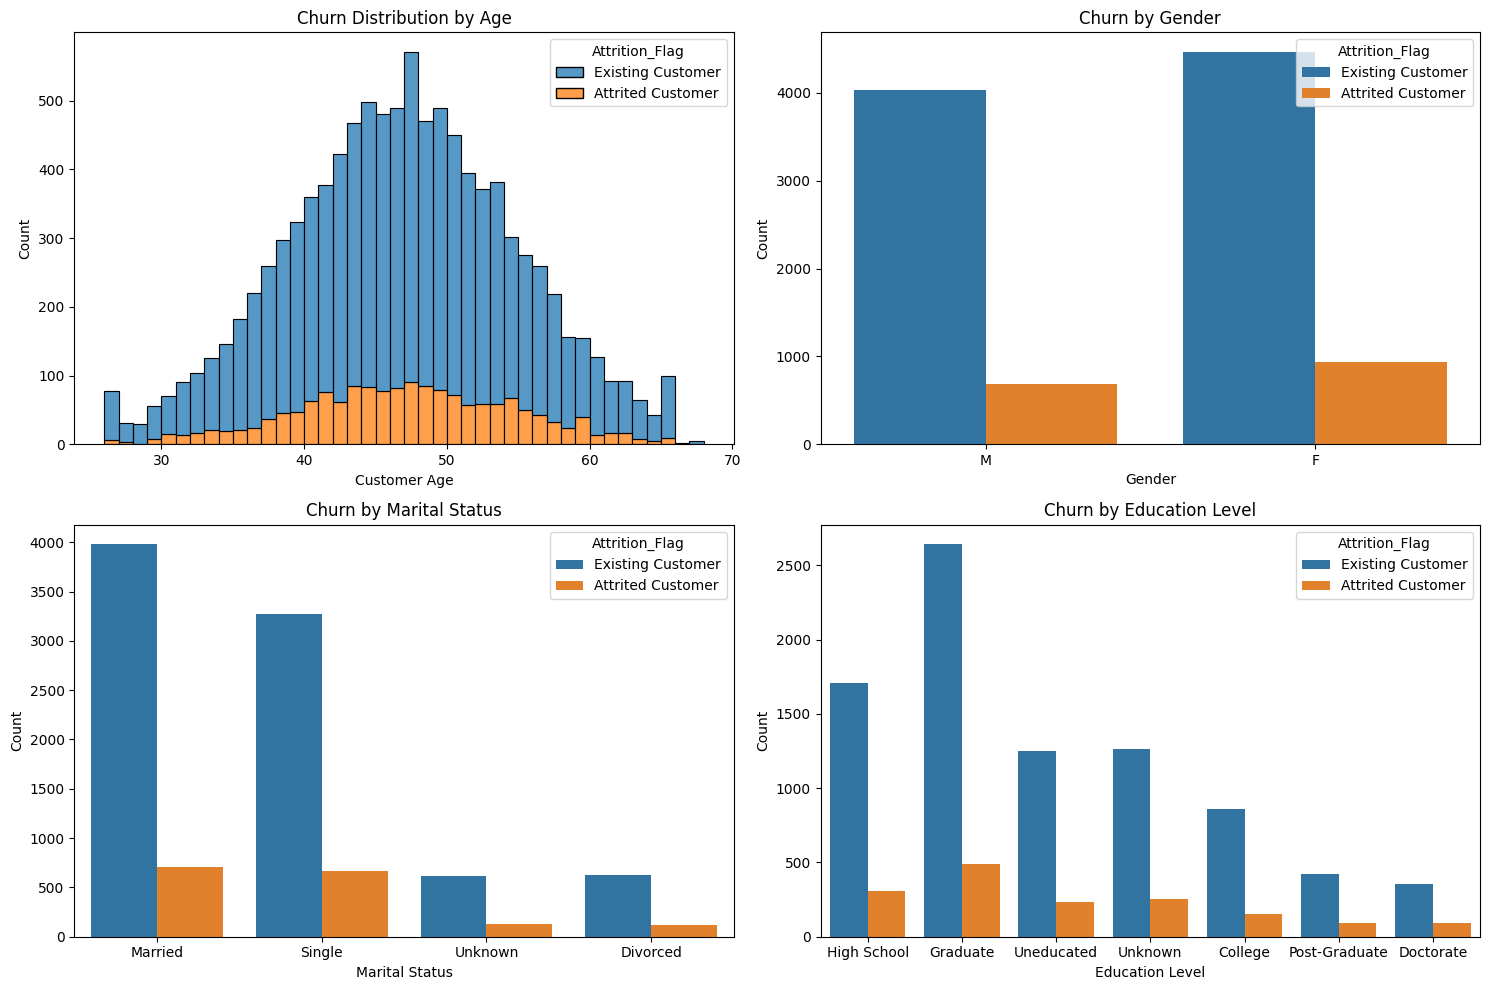

In [7]:
# 📊 Demographic Analysis
#
# Goal:
# Analyze customer demographics (age, gender, marital status, education level)
# and understand how they relate to churn.
#
# 1. Age distribution and churn trends by age groups
# 2. Gender impact on churn (Male vs Female)
# 3. Marital Status effect on churn (Single, Married, Divorced, Unknown)
# 4. Education Level and its relation to customer attrition

plt.figure(figsize=(15, 10))
# Age Distribution and Churn

plt.subplot(2, 2, 1)
sns.histplot(data=df, x="Customer_Age", hue="Attrition_Flag", multiple="stack")
plt.title("Churn Distribution by Age")
plt.xlabel("Customer Age")
plt.ylabel("Count")

# 1. Churn by Age:
#    - Younger customers (20s–30s) show lower churn.
#    - Middle-aged customers (40s–50s) have higher churn.
#    - Older customers (60+) are relatively stable but fewer in count.
#    - Middle-aged group is at the highest risk.

# Gender Impact on Churn

plt.subplot(2, 2, 2)
sns.countplot(x="Gender", hue="Attrition_Flag", data=df)
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# 2. Churn by Gender:
#    - Both male and female customers churn.
#    - Distribution is fairly balanced.
#    - Gender is NOT a strong driver of attrition.


# Marital Status Effect on Churn

plt.subplot(2, 2, 3)
sns.countplot(x="Marital_Status", hue="Attrition_Flag", data=df)
plt.title("Churn by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")

# 3. Marital Status and Churn:
#    - Single and Divorced customers show higher churn compared to Married.
#    - Married customers are more stable, possibly due to stronger financial commitments.
#    - "Unknown" category shows irregular behavior and may need further investigation.


# Education Level and Churn

plt.subplot(2, 2, 4)
sns.countplot(x="Education_Level", hue="Attrition_Flag", data=df)
plt.title("Churn by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")

# 4. Education Level and Churn:
#    - Customers with lower education (High School, Uneducated) show higher churn.
#    - Graduate and Post-Graduate customers are relatively more stable.
#    - Doctorate-level customers churn the least (smaller group, more loyal).

plt.tight_layout()
plt.show()

## 📊 Demographic Analysis Interpretation

- **Age:**
  - **Younger (20s–30s):** Lower churn, more engaged customers.  
  - **Middle-aged (40s–50s):** Highest churn risk, likely due to lifestyle and financial pressures.  
  - **Older (60+):** More stable but represent a smaller share of the base.  

- **Gender:**
  - Churn distribution is **fairly balanced** between Male and Female.  
  - **Gender is not a strong predictor** of customer attrition.  

- **Marital Status:**
  - **Single and Divorced** customers → Higher churn rates.  
  - **Married** customers → More stable, likely due to financial commitments and household responsibilities.  
  - **Unknown** category → Irregular behavior; may require deeper analysis.  

- **Education Level:**
  - **Uneducated / High School** → Higher churn, possibly linked to lower financial literacy or income.  
  - **Graduate / Post-Graduate** → More stable and loyal.  
  - **Doctorate** → Lowest churn (though small group size), suggesting strong retention in highly educated customers.  

### 🔑 Key Takeaways
- **Middle-aged, single/divorced, and lower-educated customers** are at the **highest risk of churn**.  
- Customers with **higher education and stable marital status** tend to remain loyal.  
- Retention strategies should focus on **financial education, engagement, and support programs** for vulnerable demographic groups.


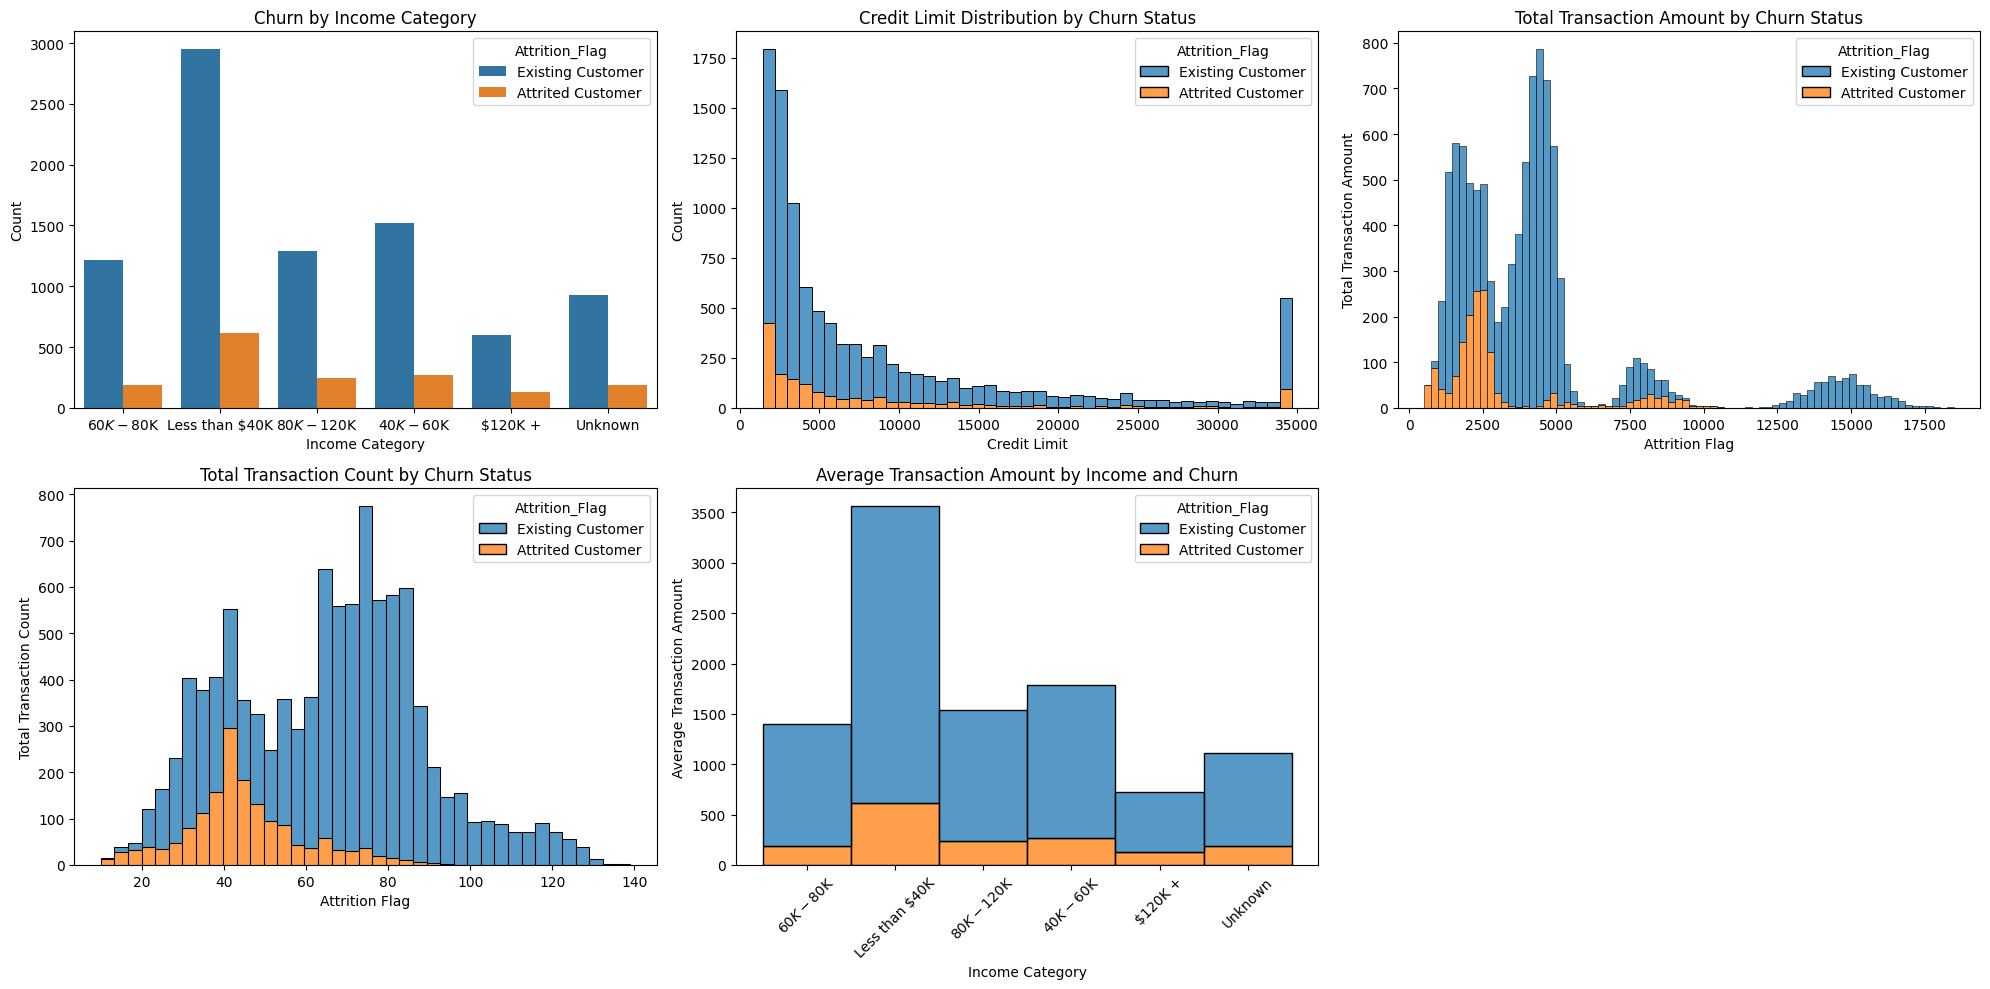

In [8]:
# 💰 Income & Spending Behavior
#
# Goal:
# Understand how income levels, credit limits, and spending behavior
# influence customer churn.
#
# 1. Churn rate by Income Category
# 2. Relationship between Credit Limit and churn
# 3. Spending patterns:
#       - Total_Trans_Amt (amount spent in transactions)
#       - Total_Trans_Ct (number of transactions)
# 4. Compare high-income vs. low-income groups in terms of activity and churn

plt.figure(figsize=(20, 10))
#CHURN BY INCOME CATEGORY

plt.subplot(2,3,1)
sns.countplot(x="Income_Category", hue="Attrition_Flag", data=df)
plt.title("Churn by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Count")

# 1. Churn by Income Category:
#    - Lower income (<$40K) → higher churn.
#    - Middle income ($40K–$80K) → moderate churn.
#    - Higher income ($120K+) → lower churn, stronger loyalty.
#    - "Unknown" income group shows higher churn too.

# CHURN BY CREDIT LIMIT

plt.subplot(2,3,2)
sns.histplot(data=df, x="Credit_Limit", hue="Attrition_Flag", multiple="stack")
plt.title("Credit Limit Distribution by Churn Status")
plt.xlabel("Credit Limit")
plt.ylabel("Count")

# 2. Credit Limit:
#    - Customers with lower credit limits churn more.
#    - Higher credit limit customers are more likely retained.
#    - Suggests credit flexibility increases loyalty.

# Total Transaction Amount vs Churn

plt.subplot(2,3,3)
sns.histplot(data=df, x="Total_Trans_Amt", hue="Attrition_Flag", multiple="stack")
plt.title("Total Transaction Amount by Churn Status")
plt.xlabel("Attrition Flag")
plt.ylabel("Total Transaction Amount")

# Total Transaction Count vs Churn

plt.subplot(2,3,4)
sns.histplot(data=df, x="Total_Trans_Ct", hue="Attrition_Flag", multiple="stack")
plt.title("Total Transaction Count by Churn Status")
plt.xlabel("Attrition Flag")
plt.ylabel("Total Transaction Count")

# 3. Spending Patterns:
#    - Churned customers have lower Total_Trans_Amt (spend less).
#    - Churned customers also have fewer Total_Trans_Ct (less engaged).
#    - Active spenders (higher transactions) are less likely to churn.

# HIGH INCOME VS LOW INCOME GROUPS

plt.subplot(2,3,5)
sns.histplot(data=df, x="Income_Category", hue="Attrition_Flag", multiple="stack")
plt.title("Average Transaction Amount by Income and Churn")
plt.xlabel("Income Category")
plt.xticks(rotation=45)

plt.ylabel("Average Transaction Amount")

# 4. High vs Low Income:
#    - High-income groups spend more and churn less.
#    - Low-income groups spend less and churn more.
#    - Indicates income strongly influences spending → retention.

plt.tight_layout()
plt.show()

## 💰 Income & Spending Behavior Interpretation

- **Income Category:**
  - **Lower income (<$40K):** Higher churn, weaker loyalty.  
  - **Middle income ($40K–$80K):** Moderate churn.  
  - **High income ($120K+):** Lower churn, more loyal and engaged.  
  - **Unknown income:** Also shows high churn, may indicate hidden risk factors.  

- **Credit Limit:**
  - **Low credit limit customers churn more**, possibly due to dissatisfaction with restrictions.  
  - **High credit limit customers are retained more**, suggesting credit flexibility improves loyalty.  

- **Spending Patterns:**
  - **Churned customers spend less** (lower Total_Trans_Amt).  
  - They also **make fewer transactions** (lower Total_Trans_Ct).  
  - **Active spenders (high amount + frequent transactions) are less likely to churn.**  

- **High vs Low Income Groups:**
  - **High-income groups:** Spend more, stay loyal.  
  - **Low-income groups:** Spend less, churn more often.  
  - Strong link between **income → spending power → retention**.  

### 🔑 Key Takeaways
- Churn is driven by **financial capacity and engagement levels**.  
- **Low-income and low-credit-limit customers** are at the highest risk of leaving.  
- Increasing **credit flexibility, targeted offers, and engagement programs** for lower-income groups may reduce churn.  
- Retaining **high-spending, high-income customers** is crucial as they bring long-term value.


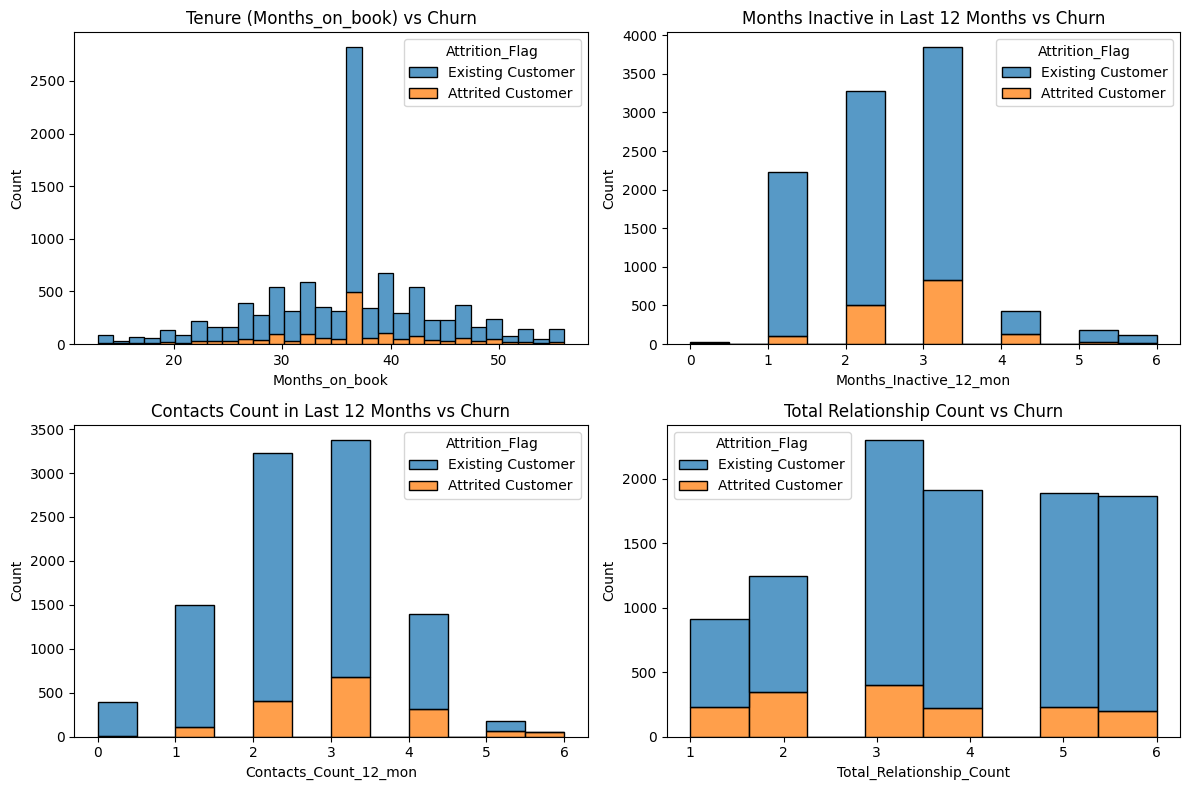

In [9]:
# 📊 Customer Engagement ANALYSIS
#
# Goal:
# Understand how customer engagement metrics influence churn.
#
# 1. Months_on_book (tenure) vs churn
# 2. Months_Inactive_12_mon vs churn
# 3. Contacts_Count_12_mon vs churn
# 4. Total_Relationship_Count vs churn

plt.figure(figsize=(12, 8))
# MONTHS ON BOOK VS CHURN

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Months_on_book', hue='Attrition_Flag', multiple='stack', bins=30)
plt.title('Tenure (Months_on_book) vs Churn')
plt.xlabel('Months_on_book')
plt.ylabel('Count')

# 1. Months_on_book (Tenure) vs Churn:
#    - Tenure is almost the same for churned and existing customers.
#    - Long tenure does not guarantee loyalty.
#    - Indicates tenure alone is not a strong driver of churn.

# Months_Inactive_12_mon vs churn

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Months_Inactive_12_mon', hue='Attrition_Flag', multiple='stack', bins=12)
plt.title('Months Inactive in Last 12 Months vs Churn')
plt.xlabel('Months_Inactive_12_mon')
plt.ylabel('Count')

# 2. Months_Inactive_12_mon vs Churn:
#    - Churned customers are inactive longer on average.
#    - Higher inactivity increases churn risk.
#    - Indicates inactivity is a strong signal of disengagement.


# Contacts_Count_12_mon vs churn

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Contacts_Count_12_mon', hue='Attrition_Flag', multiple='stack', bins=12)
plt.title('Contacts Count in Last 12 Months vs Churn')
plt.xlabel('Contacts_Count_12_mon')
plt.ylabel('Count')

# 3. Contacts_Count_12_mon vs Churn:
#    - Churned customers contact the bank more often.
#    - Frequent contacts may reflect issues or dissatisfaction.
#    - Indicates high contact frequency can be a churn warning sign.

# Total_Relationship_Count vs churn

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Total_Relationship_Count', hue='Attrition_Flag', multiple='stack', bins=8)
plt.title('Total Relationship Count vs Churn')
plt.xlabel('Total_Relationship_Count')
plt.ylabel('Count')

# 4. Total_Relationship_Count vs Churn:
#    - Existing customers hold more products/relationships than churned ones.
#    - Multiple relationships strengthen loyalty and reduce churn.
#    - Indicates cross-selling and deeper engagement improve retention.

plt.tight_layout()
plt.show()

## 📊 Customer Engagement Analysis Interpretation

- **Tenure (Months_on_book):**
  - Churned and retained customers show **similar tenure**.  
  - **Length of relationship alone does not guarantee loyalty**.  
  - Tenure is not a strong standalone churn predictor.  

- **Inactivity (Months_Inactive_12_mon):**
  - **Churned customers are inactive longer** on average.  
  - High inactivity strongly correlates with churn risk.  
  - Inactivity is a **key signal of disengagement**.  

- **Contact Frequency (Contacts_Count_12_mon):**
  - Churned customers **contact the bank more often**.  
  - Frequent contacts may indicate **frustration, complaints, or unresolved issues**.  
  - High contact frequency can serve as an **early churn warning sign**.  

- **Relationship Depth (Total_Relationship_Count):**
  - Existing customers hold **more products/accounts** than churned customers.  
  - More relationships → **higher loyalty and lower churn**.  
  - Cross-selling and deeper engagement improve retention.  

### 🔑 Key Takeaways
- **Inactivity, high contact frequency, and fewer product relationships** are strong churn signals.  
- **Engaged customers with multiple relationships are more loyal**.  
- Banks should:  
  - Monitor inactivity patterns.  
  - Treat frequent contacts as **churn alerts**.  
  - Encourage cross-product adoption to **strengthen loyalty**.  


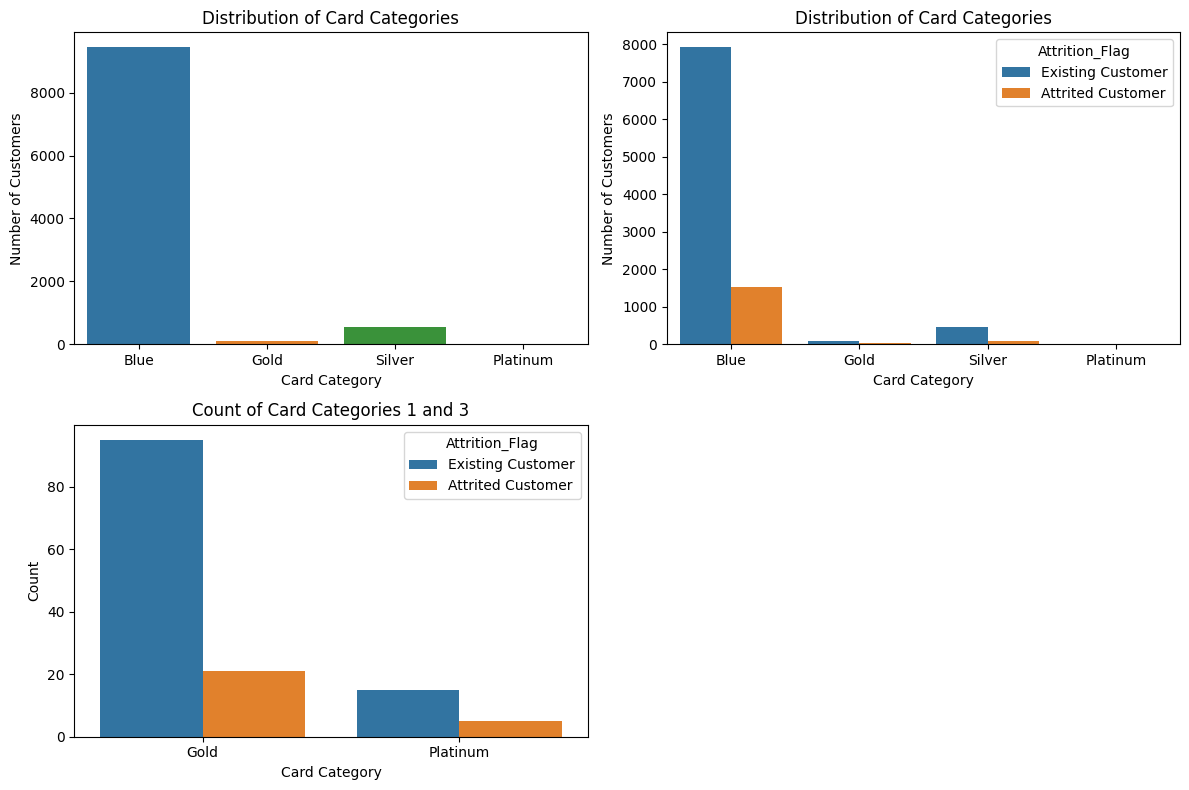

In [10]:
# 💳 Card Analysis
#
# Goal:
# Understand how card type influences customer churn.
#
# 1. Distribution of Card Category
#       - How many customers hold each card type (Blue, Silver, Gold, Platinum)?
# 2. Churn rate by Card Category
#       - Which card types have higher or lower churn rates?
# 3. Premium Cardholders vs Churn
#       - Are premium cardholders (Gold, Platinum) less likely to churn?

plt.figure(figsize=(12, 8))  # single figure for all 3 charts
# DISTRIBUTION OF CARD CATEGORY

plt.subplot(2, 2, 1)
sns.countplot(x='Card_Category', data=df, hue='Card_Category')
plt.title('Distribution of Card Categories')
plt.xlabel('Card Category')
plt.ylabel('Number of Customers')

# 1. Distribution of Card Category:
#    - Most customers hold Blue cards, while Silver, Gold, and Platinum are much less common.
#    - Customer base is heavily concentrated in entry-level card types.

# CHURN RATE BY CARD CATEGORY

plt.subplot(2, 2, 2)
sns.countplot(x='Card_Category', data=df, hue='Attrition_Flag')
plt.title('Distribution of Card Categories')
plt.xlabel('Card Category')
plt.ylabel('Number of Customers')

# 2. Churn rate by Card Category:
#    - Blue cardholders contribute the majority of churn simply because they are the largest group.
#    - Premium cards (Gold, Platinum) have smaller churn counts, partly due to fewer customers.
#    - Indicates churn patterns differ across card tiers.

# PREMIUM CARDHOLDERS VS CHURN

plt.subplot(2, 2, 3)
sns.countplot(x='Card_Category', data=df[df["Card_Category"].isin(["Gold", "Platinum"])], hue='Attrition_Flag')
plt.title("Count of Card Categories 1 and 3")
plt.xlabel("Card Category")
plt.ylabel("Count")

# 3. Premium Cardholders vs Churn:
#    - Premium cardholders (Gold, Platinum) appear less likely to churn compared to Blue holders.
#    - Suggests higher-value customers are more loyal, possibly due to better benefits and stronger engagement.


plt.tight_layout()
plt.show()

## 💳 Card Analysis Interpretation

- **Distribution of Card Categories:**
  - The vast majority of customers hold **Blue cards** (entry-level).  
  - **Silver, Gold, and Platinum** cardholders are much fewer in comparison.  
  - The customer base is **heavily concentrated in lower-tier cards**.  

- **Churn Rate by Card Category:**
  - **Blue cardholders** account for most of the churn, largely because they represent the largest group.  
  - **Premium cards (Gold, Platinum)** have fewer churn cases, partly due to smaller customer counts.  
  - Churn patterns clearly **vary across card tiers**.  

- **Premium Cardholders vs Churn:**
  - **Gold and Platinum customers churn less** than Blue cardholders.  
  - Indicates **premium benefits and stronger engagement help retain customers**.  
  - Premium customers are more loyal and likely bring **higher lifetime value**.  

### 🔑 Key Takeaways
- **Blue cardholders drive most of the churn**, being the largest segment and least engaged.  
- **Premium cardholders (Gold/Platinum) are more stable and loyal**.  
- Retention strategies should focus on:  
  - **Upgrading Blue cardholders** by offering incentives to move to higher tiers.  
  - Enhancing the **value proposition of entry-level cards** to reduce dissatisfaction.  
  - Maintaining **strong perks for premium customers** to secure loyalty.  


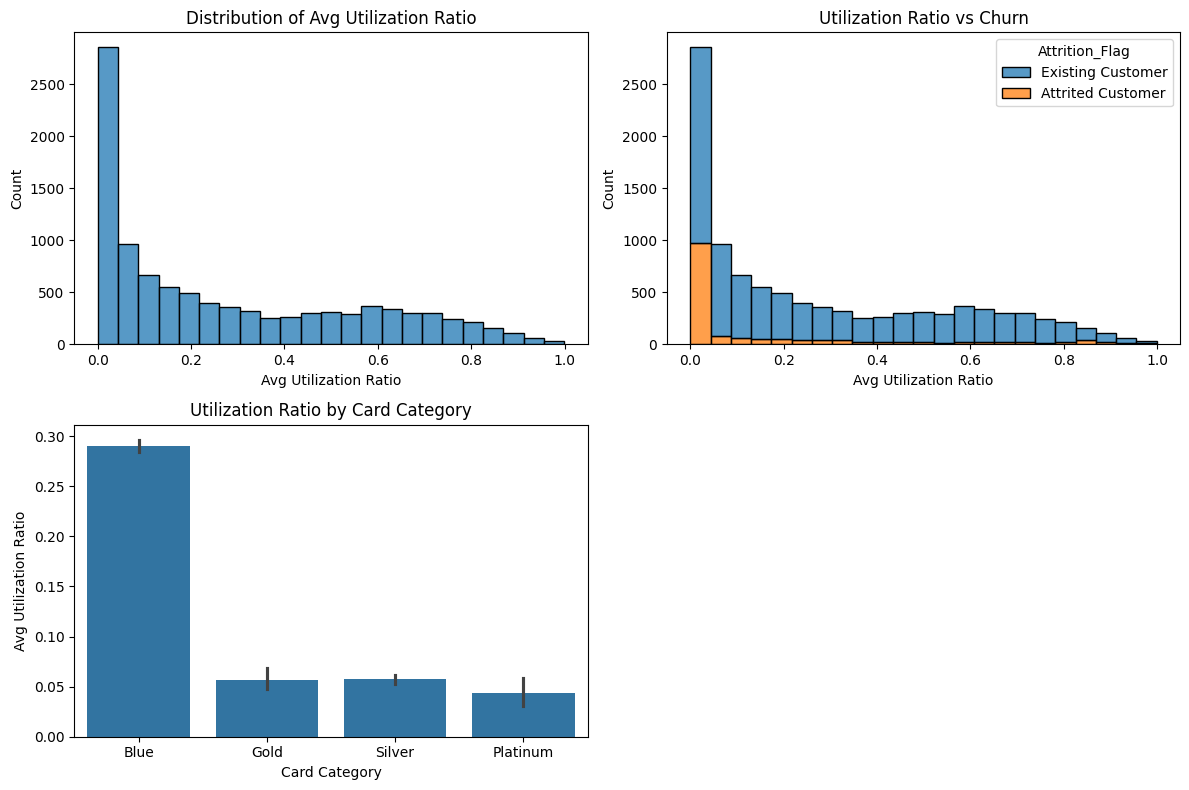

In [11]:
# 💳 Credit Utilization
#
# Goal:
# Understand how customers’ credit usage relates to churn.
#
# 1. Avg_Utilization_Ratio
#       - How much of their available credit do customers use on average?
# 2. Relationship between utilization and churn
#       - Does higher utilization correspond to higher churn?
# 3. Utilization by Card Category

plt.figure(figsize=(12, 8))

# 1. Distribution of Avg_Utilization_Ratio

plt.subplot(2, 2, 1)
sns.histplot(df["Avg_Utilization_Ratio"])
plt.title("Distribution of Avg Utilization Ratio")
plt.xlabel("Avg Utilization Ratio")
plt.ylabel("Count")

# 1. Avg_Utilization_Ratio:
#    - Most customers have low utilization ratios (closer to 0).
#    - Only a small group uses a high share of their available credit.
#    - Indicates majority manage credit conservatively.

# 2. Relationship between utilization and churn

plt.subplot(2, 2, 2)
sns.histplot(x="Avg_Utilization_Ratio", hue="Attrition_Flag", multiple="stack", data=df)
plt.title("Utilization Ratio vs Churn")
plt.xlabel("Avg Utilization Ratio")
plt.ylabel("Count")

# 2. Relationship between Utilization and Churn:
#    - Churn is more visible among customers with lower utilization.
#    - Low-to-moderate utilization customers are high likely to churn.
#    - Suggests lower utilization corresponds to higher churn risk.


# 3. Utilization by Card Category

plt.subplot(2, 2, 3)
sns.barplot(x="Card_Category", y="Avg_Utilization_Ratio", data=df)
plt.title("Utilization Ratio by Card Category")
plt.xlabel("Card Category")
plt.ylabel("Avg Utilization Ratio")

# 3. Utilization by Card Category:
#    - Average utilization varies across card types.
#    - Entry-level cardholders (e.g., Blue) tend to use more of their credit.
#    - Premium cardholders (Gold, Platinum) generally show lower utilization.
#    - Indicates higher-tier customers manage credit better and are less risky.

plt.tight_layout()
plt.show()


## 💳 Credit Utilization Analysis Interpretation

- **Average Utilization Ratio:**
  - Most customers have **low utilization ratios** (closer to 0).  
  - Only a small group uses a **high share of their available credit**.  
  - Indicates that the majority of customers **manage credit conservatively**.  

- **Utilization and Churn:**
  - **Churn is more common among low-to-moderate utilization customers**.  
  - Customers who use **very little of their credit** are more likely to leave, suggesting disengagement.  
  - High utilization customers appear more engaged and **less likely to churn**.  

- **Utilization by Card Category:**
  - **Entry-level cardholders (Blue)** → Tend to have **higher utilization**.  
  - **Premium cardholders (Gold, Platinum)** → Show **lower utilization**, reflecting stronger financial management.  
  - Suggests premium customers are **lower risk and more stable**.  

### 🔑 Key Takeaways
- **Low credit utilization can be a churn warning sign**, as disengaged customers are less likely to stay.  
- Premium customers use credit more responsibly and **churn less often**.  
- Retention strategies should:  
  - Encourage **responsible but active usage** among low-utilization customers.  
  - Provide **incentives for Blue cardholders** to stay engaged.  
  - Maintain benefits for premium cardholders to ensure continued loyalty.  
